In [23]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from ipynb.fs.full.main_functions import Lasso_regression
from ipynb.fs.full.main_functions import iterateLasso
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
data_full = pd.read_csv('results/HB_predittori2.csv')
data_y = pd.read_csv('results/tfce.csv')
data_full = pd.concat([data_full, data_y], axis=1)

data_full = data_full.dropna().reset_index()
data_full = data_full.drop(columns = ["index", "Unnamed: 0", "ResponseId"])

data_y1 = data_full[["TFCE"]]
data_y2 = data_full[["Yoon"]]
data_y3 = data_full[["Barton"]]
data_y4 = data_full[["Corr"]]

data_y_total = pd.concat([data_y1, data_y2, data_y3, data_y4], axis=1)



#define predictor and response variables
X = data_full[["dx/sx", "Cons/prog", "Ind/col", "Flame", "Agreeableness", "Conscientiousness", "Em Stability", "Extroversion", "Openness", "Social Use"]]
X_corr = data_full[["dx/sx", "Cons/prog", "Ind/col", "Flame", "Agreeableness", "Conscientiousness", "Em Stability", "Extroversion", "Openness", "Social Use"]]


Best Score: -0.806139226683861
Best Hyperparameters: {'alpha': 0.1, 'fit_intercept': False, 'positive': False, 'selection': 'cyclic'}
0.05496233961541219
0.938865229541604
dx/sx               -0.10928
Cons/prog            0.00000
Ind/col             -0.00000
Flame                0.00000
Agreeableness        0.00000
Conscientiousness    0.00000
Em Stability        -0.00000
Extroversion         0.00000
Openness             0.00000
Social Use           0.00000
dtype: float64
Best Score: -0.8259729282092282
Best Hyperparameters: {'alpha': 0.1, 'fit_intercept': False, 'positive': False, 'selection': 'random'}
-0.04594137979387303
0.7930140550260755
dx/sx               -0.128564
Cons/prog            0.000000
Ind/col             -0.000000
Flame                0.000000
Agreeableness        0.000000
Conscientiousness    0.000000
Em Stability        -0.000000
Extroversion        -0.000000
Openness             0.000000
Social Use          -0.000000
dtype: float64
Best Score: -0.8090737415838898
B

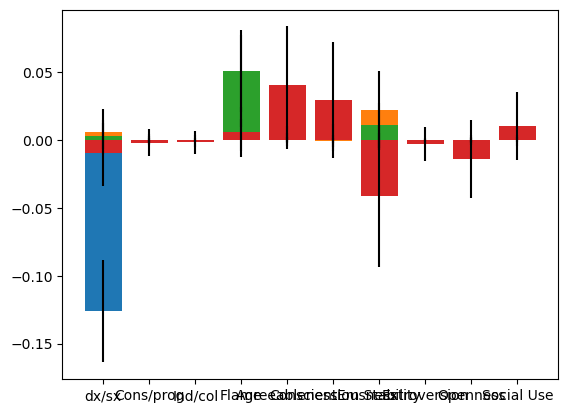

In [25]:

for colname, colval in data_y_total.iteritems():
    
    r2, RMSE, final_coeffs = iterateLasso(1000, 10, X, np.reshape(colval.values, newshape=(len(colval.values), 1)))
    sns.barplot(X.columns, final_coeffs, yerr=np.std(final_coeffs, axis=0))
    np.savetxt('lasso_coefficients_{}.csv'.format(str(colname)), np.mean(final_coeffs, axis=0), delimiter=',')
    np.savetxt('lasso_coefficients_std_{}.csv'.format(str(colname)), np.std(final_coeffs), delimiter=',')




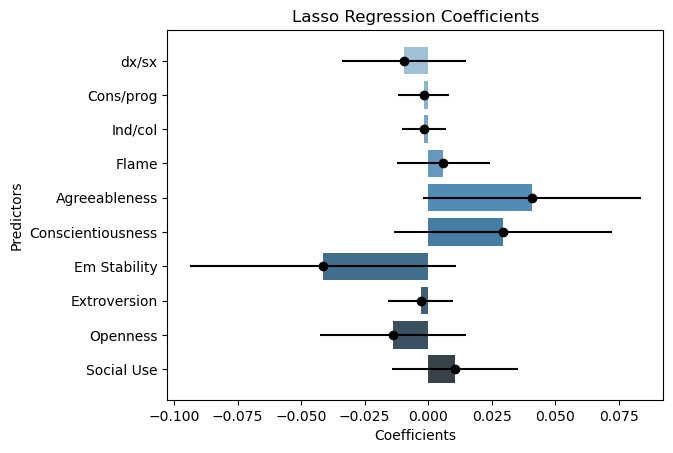

In [28]:
sns.barplot(x=final_coeffs, y=X.columns, palette="Blues_d")
plt.errorbar(final_coeffs, X.columns, xerr=stdCoeffs, fmt='o', color='black')
plt.title("Lasso Regression Coefficients")
plt.xlabel("Coefficients")
plt.ylabel("Predictors")
plt.show()
